In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows',1000)

In [2]:
#Read in merged paint data file
df = pd.read_csv('Paint_Data_Merged.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(30)

metric  value                 time  is_prod  count
0   E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
1   E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2   E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
3   E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
4   E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
5   E_C100  110.0  2022-04-15 05:00:00      0.0    0.0
6   E_C100  100.0  2022-04-15 06:00:00      0.0    0.0
7   E_C100  110.0  2022-04-15 07:00:00      0.0    0.0
8   E_C100  110.0  2022-04-15 08:00:00      0.0    0.0
9   E_C100  110.0  2022-04-15 09:00:00      0.0    0.0
10  E_C100  110.0  2022-04-15 10:00:00      0.0    0.0
11  E_C100  110.0  2022-04-15 11:00:00      0.0    0.0
12  E_C100  120.0  2022-04-15 12:00:00      0.0    0.0
13  E_C100  120.0  2022-04-15 13:00:00      0.0    0.0
14  E_C100  110.0  2022-04-15 14:00:00      0.0    0.0
15  E_C100  120.0  2022-04-15 15:00:00      0.0    0.0
16  E_C100  120.0  2022-04-15 16:00:00      0.0    0.0
17  E_C100  110.0  2022-04-15 17:00:00      0.0    0.0
18  E_C100  110.0  2022-04-15 18:00:00      0.0    0.0
19  E_C100  120.0  2022-04-15 19:00:00      0.0    0.0
20  E_C100  130.0  2022-04-15 20:00:00      0.0    0.0
21  E_C100  120.0  2022-04-15 21:00:00      0.0    0.0
22  E_C100  110.0  2022-04-15 22:00:00      0.0    0.0
23  E_C100  120.0  2022-04-15 23:00:00      0.0    0.0
24  E_C100  120.0  2022-04-16 00:00:00      0.0    0.0
25  E_C100  120.0  2022-04-16 01:00:00      0.0    0.0
26  E_C100  110.0  2022-04-16 02:00:00      0.0    0.0
27  E_C100  120.0  2022-04-16 03:00:00      0.0    0.0
28  E_C100  120.0  2022-04-16 04:00:00      0.0    0.0
29  E_C100  120.0  2022-04-16 05:00:00      0.0    0.0

In [3]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')

In [4]:
df['metric'].unique()

array(['E_C100', 'E_C1000', 'E_C1100', 'E_C1200', 'E_C200', 'E_C300',
       'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800'], dtype=object)

In [5]:
meters = ['E_C100', 'E_C200', 'E_C300', 'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800']

In [6]:
def df_to_X_y_multivar(df, X_start = [], y_start = [], window_size = 10):
    df_as_np= df.to_numpy()
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return X, y 

In [7]:
df

metric  value                 time  is_prod  count
time                                                                   
2022-04-15 00:00:00  E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
2022-04-15 01:00:00  E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2022-04-15 02:00:00  E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
2022-04-15 03:00:00  E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
2022-04-15 04:00:00  E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
...                     ...    ...                  ...      ...    ...
2022-06-29 06:00:00  E_C800  300.0  2022-06-29 06:00:00      0.0   63.0
2022-06-29 07:00:00  E_C800  310.0  2022-06-29 07:00:00      1.0   71.0
2022-06-29 08:00:00  E_C800  300.0  2022-06-29 08:00:00      1.0   56.0
2022-06-29 09:00:00  E_C800  300.0  2022-06-29 09:00:00      1.0   75.0
2022-06-29 10:00:00  E_C800  300.0  2022-06-29 10:00:00      1.0   27.0

[19921 rows x 5 columns]

In [8]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(df['value'])

In [9]:
usage_df = df

usage_df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df['Day sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Day cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Year sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/year))
usage_df['Year cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/year))

usage_df = usage_df.drop(['Seconds'], axis =1)
usage_df = usage_df.loc[usage_df['metric'].isin(meters)]

usage_df = pd.get_dummies(usage_df, columns=['metric'])
usage_df = usage_df.drop(['time'], axis = 1)

In [10]:
usage_df

value  is_prod  count       Day sin       Day cos  \
time                                                                     
2022-04-15 00:00:00  390.0      0.0    0.0 -1.271365e-11  1.000000e+00   
2022-04-15 01:00:00  120.0      0.0    0.0  2.588190e-01  9.659258e-01   
2022-04-15 02:00:00  120.0      0.0    0.0  5.000000e-01  8.660254e-01   
2022-04-15 03:00:00  120.0      0.0    0.0  7.071068e-01  7.071068e-01   
2022-04-15 04:00:00  110.0      0.0    0.0  8.660254e-01  5.000000e-01   
...                    ...      ...    ...           ...           ...   
2022-06-29 06:00:00  300.0      0.0   63.0  1.000000e+00  1.302874e-11   
2022-06-29 07:00:00  310.0      1.0   71.0  9.659258e-01 -2.588190e-01   
2022-06-29 08:00:00  300.0      1.0   56.0  8.660254e-01 -5.000000e-01   
2022-06-29 09:00:00  300.0      1.0   75.0  7.071068e-01 -7.071068e-01   
2022-06-29 10:00:00  300.0      1.0   27.0  5.000000e-01 -8.660254e-01   

                     Year sin  Year cos  metric_E_C100  metric_E_C200  \
time                                                                    
2022-04-15 00:00:00  0.974794 -0.223108              1              0   
2022-04-15 01:00:00  0.974634 -0.223807              1              0   
2022-04-15 02:00:00  0.974473 -0.224505              1              0   
2022-04-15 03:00:00  0.974312 -0.225204              1              0   
2022-04-15 04:00:00  0.974150 -0.225902              1              0   
...                       ...       ...            ...            ...   
2022-06-29 06:00:00  0.051263 -0.998685              0              0   
2022-06-29 07:00:00  0.050547 -0.998722              0              0   
2022-06-29 08:00:00  0.049832 -0.998758              0              0   
2022-06-29 09:00:00  0.049116 -0.998793              0              0   
2022-06-29 10:00:00  0.048400 -0.998828              0              0   

                     metric_E_C300  metric_E_C400  metric_E_C500  \
time                                                               
2022-04-15 00:00:00              0              0              0   
2022-04-15 01:00:00              0              0              0   
2022-04-15 02:00:00              0              0              0   
2022-04-15 03:00:00              0              0              0   
2022-04-15 04:00:00              0              0              0   
...                            ...            ...            ...   
2022-06-29 06:00:00              0              0              0   
2022-06-29 07:00:00              0              0              0   
2022-06-29 08:00:00              0              0              0   
2022-06-29 09:00:00              0              0              0   
2022-06-29 10:00:00              0              0              0   

                     metric_E_C600  metric_E_C700  metric_E_C800  
time                                                              
2022-04-15 00:00:00              0              0              0  
2022-04-15 01:00:00              0              0              0  
2022-04-15 02:00:00              0              0              0  
2022-04-15 03:00:00              0              0              0  
2022-04-15 04:00:00              0              0              0  
...                            ...            ...            ...  
2022-06-29 06:00:00              0              0              1  
2022-06-29 07:00:00              0              0              1  
2022-06-29 08:00:00              0              0              1  
2022-06-29 09:00:00              0              0              1  
2022-06-29 10:00:00              0              0              1  

[14488 rows x 15 columns]

In [11]:
metric_cols = ['metric_E_C100','metric_E_C200','metric_E_C300','metric_E_C400','metric_E_C500','metric_E_C600','metric_E_C700','metric_E_C800']
WINDOW_SIZE= 24
X = []
y = []

for meter in metric_cols:
    df_subset = usage_df.loc[usage_df[meter]==1].copy()
    
    X, y= df_to_X_y_multivar(df_subset, X, y, WINDOW_SIZE) 

    print(len(X))
X = np.array(X)
y = np.array(y)

    

1787
3574
5361
7148
8935
10722
12509
14296


In [12]:
#Split arrays into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

usage_training_mean = np.mean(X_train[:,:,0])
usage_training_std = np.std(X_train[:,:,0])

print('mean: ',usage_training_mean )
print('std: ',usage_training_std )

def preprocess(X_temp):
    X_temp[:,:,0] = (X_temp[:,:,0] - usage_training_mean) / usage_training_std
    return X_temp

def preprocess_output(y_temp):
    y_temp = (y_temp - usage_training_mean) / usage_training_std
    return y_temp

def postprocess_output(y_temp):
    y_temp = (y_temp* usage_training_std ) + usage_training_mean
    return y_temp


pp_X_train = preprocess(X_train)
pp_y_train = preprocess_output(y_train)

pp_X_test = preprocess(X_test)
pp_y_test = preprocess_output(y_test)

mean:  361.1588040690218
std:  299.8906283956299


In [13]:
usage_training_mean

361.1588040690218

In [14]:
 
test = np.array([1060, 1040, 1040])    


test = preprocess_output(test)


(test* usage_training_std ) + usage_training_mean

array([1060., 1040., 1040.])

<h1>Model</h1>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#model2 = Sequential()
#model2.add(InputLayer((WINDOW_SIZE, 15)))
#model2.add(GRU(64))
#model2.add(Dense(8,'relu'))
#model2.add(Dense(1,'linear'))

#model2.summary()



model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='swish', input_shape=(WINDOW_SIZE, 15)))
model.add(LSTM(128, return_sequences=True, activation='swish'))
model.add(LSTM(64, return_sequences=False, activation='swish'))
#Add dense layer
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            20480     
                                                                 
 lstm_1 (LSTM)               (None, 24, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 174,977
Trainable params: 174,977
Non-trai

In [16]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [17]:
model.fit(pp_X_train, pp_y_train, validation_data=(pp_X_test, pp_y_test), epochs=(50))

Epoch 1/50
358/358 [==============================] - 63s 143ms/step - loss: 0.3361 - root_mean_squared_error: 0.5797 - val_loss: 0.1888 - val_root_mean_squared_error: 0.4345
Epoch 2/50
358/358 [==============================] - 49s 138ms/step - loss: 0.1507 - root_mean_squared_error: 0.3882 - val_loss: 0.1501 - val_root_mean_squared_error: 0.3874
Epoch 3/50
358/358 [==============================] - 50s 140ms/step - loss: 0.1073 - root_mean_squared_error: 0.3276 - val_loss: 0.0947 - val_root_mean_squared_error: 0.3078
Epoch 4/50
358/358 [==============================] - 50s 139ms/step - loss: 0.0877 - root_mean_squared_error: 0.2962 - val_loss: 0.0885 - val_root_mean_squared_error: 0.2974
Epoch 5/50
358/358 [==============================] - 50s 140ms/step - loss: 0.0764 - root_mean_squared_error: 0.2765 - val_loss: 0.0825 - val_root_mean_squared_error: 0.2872
Epoch 6/50
358/358 [==============================] - 50s 139ms/step - loss: 0.0709 - root_mean_squared_error: 0.2663 - val_l

358/358 [==============================] - 34s 95ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.0771 - val_root_mean_squared_error: 0.2777
Epoch 48/50
358/358 [==============================] - 34s 94ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0825 - val_root_mean_squared_error: 0.2873
Epoch 49/50
358/358 [==============================] - 34s 95ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0826 - val_root_mean_squared_error: 0.2874
Epoch 50/50
358/358 [==============================] - 34s 94ms/step - loss: 0.0178 - root_mean_squared_error: 0.1336 - val_loss: 0.0797 - val_root_mean_squared_error: 0.2824


In [18]:
pp_X_test.shape

(2860, 24, 15)

In [19]:
test_predictions = model.predict(pp_X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':postprocess_output(test_predictions), 'Actuals': y_test})
test_results.head(100)

90/90 [==============================] - 4s 32ms/step


Test Predictions  Actuals
0         706.540344    670.0
1         228.060394    310.0
2         219.237213    160.0
3         791.340027    770.0
4         669.750610    680.0
5          92.598816     50.0
6         465.304871    450.0
7         710.439331    710.0
8        1001.040100    900.0
9         184.024429     40.0
10         32.463104     20.0
11         37.874481     30.0
12        572.972595    590.0
13        502.362183    470.0
14        693.227356    690.0
15        631.861389    600.0
16        285.080994    210.0
17        326.894043    270.0
18        532.345581    600.0
19       1104.781982   1080.0
20        291.769287    300.0
21        268.012024    250.0
22        465.674103    430.0
23        641.384766    630.0
24        403.955780    450.0
25       1044.820312    950.0
26        269.033203    160.0
27        283.376587    280.0
28         37.950500     10.0
29        788.663757    790.0
30        271.875763    270.0
31        249.608643    740.0
32         18.813232     10.0
33         20.109039     10.0
34        665.383301    650.0
35        332.472229    240.0
36        215.374390    220.0
37         99.115662     90.0
38        787.567871    760.0
39        142.105942    130.0
40        132.837189    120.0
41         22.280060     30.0
42         21.829376     10.0
43        659.135498    680.0
44        246.359116    480.0
45        783.672974    740.0
46        470.535339    440.0
47        313.062073    310.0
48        767.448853    470.0
49        315.141785    310.0
50         34.257477     10.0
51        344.931274    340.0
52        305.852325    310.0
53        338.247864    320.0
54       1120.607178   1070.0
55        340.512604    260.0
56        292.472717    280.0
57        685.298950    680.0
58        273.711273    270.0
59         53.876526     60.0
60         21.592560     20.0
61        123.000610    300.0
62         22.249115    650.0
63        505.776306    540.0
64        390.864044     40.0
65        795.206482    770.0
66        520.517517    640.0
67         61.212128    160.0
68        154.410309    130.0
69        306.557495    310.0
70        657.463562    720.0
71        127.257019    120.0
72        680.650085    660.0
73         21.416992     10.0
74        299.192200    310.0
75        190.203522    210.0
76        694.490479    670.0
77         -4.056549      0.0
78        155.069168    160.0
79        118.891205    130.0
80        285.145935    290.0
81         37.098724     10.0
82        155.888901      0.0
83        237.995911     70.0
84        668.012512    640.0
85        235.410049    210.0
86        312.266174    320.0
87        272.596527      0.0
88        351.547882    310.0
89        493.632477    470.0
90        382.437592    250.0
91        299.384796    360.0
92        633.446533    640.0
93         90.969940     30.0
94        138.979156    120.0
95        790.928467    780.0
96        505.479340    480.0
97         57.305115     60.0
98        136.341660    130.0
99        242.942108    210.0

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, postprocess_output(test_predictions), squared=False)

84.67934919361544

In [21]:
test_predictions

array([ 1.1516917 , -0.4438232 , -0.47324452, ..., -0.3669172 ,
       -0.2453392 , -1.1251798 ], dtype=float32)

In [22]:
train_predictions = model.predict(preprocess(X)).flatten()
train_results=pd.DataFrame(data={'Train Predictions':postprocess_output(train_predictions), 'Actuals': y})
train_results.head(100)

447/447 [==============================] - 14s 32ms/step


Train Predictions  Actuals
0          117.902618    120.0
1          118.127090    120.0
2          123.107391    110.0
3          117.989349    120.0
4          123.946045    120.0
5          127.317093    120.0
6          130.906418    130.0
7          140.361832    150.0
8          157.314377    160.0
9          167.400223    160.0
10         173.800110    160.0
11         179.253204    150.0
12         167.645874    150.0
13         164.903778    150.0
14         160.697357    130.0
15         137.089905    130.0
16         130.750977    120.0
17         121.144516    120.0
18         126.050949    130.0
19         145.371002    130.0
20         154.062714    130.0
21         152.229065    130.0
22         142.635727    130.0
23         134.837448    130.0
24         130.580933    120.0
25         120.866821    130.0
26         129.950089    130.0
27         133.937347    130.0
28         137.229523    130.0
29         137.083374    120.0
30         134.094437    130.0
31         143.620377    120.0
32         139.211502    120.0
33         136.191986    130.0
34         144.893814    130.0
35         153.942978    130.0
36         160.123459    120.0
37         142.753052    120.0
38         133.788132    120.0
39         127.026413    120.0
40         127.258759    120.0
41         129.718445    120.0
42         132.601196    120.0
43         133.697174    130.0
44         145.065826    130.0
45         145.042679    130.0
46         143.378571    130.0
47         137.855591    130.0
48         133.455673    130.0
49         130.926178    130.0
50         131.027786    130.0
51         132.152359    130.0
52         133.559402    130.0
53         134.595200    130.0
54         136.851929    120.0
55         136.772446    130.0
56         145.582748    140.0
57         151.062363    130.0
58         144.990829    130.0
59         151.691666    340.0
60         455.238464    480.0
61         520.352478    480.0
62         533.176270    470.0
63         532.169128    480.0
64         515.811523    470.0
65         483.985168    580.0
66         560.331299    550.0
67         561.929443    560.0
68         531.030518    550.0
69         467.815277    570.0
70         432.160278    540.0
71         378.630585    420.0
72         285.297089    310.0
73         308.976868    330.0
74         393.940826    420.0
75         519.164490    610.0
76         598.838928    570.0
77         683.941467    720.0
78         823.623901    840.0
79         972.923767    950.0
80        1048.411865    980.0
81        1071.031982   1050.0
82        1091.125977   1090.0
83        1095.211670   1070.0
84        1090.785889   1030.0
85        1096.702393   1090.0
86        1087.925781   1070.0
87         929.786438    950.0
88        1029.920410    990.0
89        1127.370728   1100.0
90        1095.719238   1080.0
91        1112.339600   1090.0
92        1088.335449   1060.0
93        1122.819946   1100.0
94        1086.361572   1090.0
95        1121.718262   1090.0
96        1028.497437   1000.0
97         798.351929    780.0
98         512.474060    390.0
99         285.080994    210.0

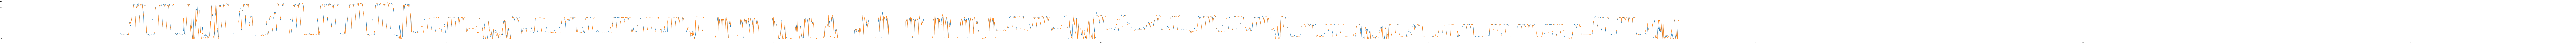

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(900,15))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

<h1>Validation Set and Bootstrapping</h1>

In [24]:
WINDOW_SIZE = 24


df_val = pd.read_csv('Val_Paint_Data_Merged.csv')
df_val = df_val.drop(['Unnamed: 0'], axis=1)
df_val.index = pd.to_datetime(df_val['time'], format='%Y.%m.%d %H:%M:%S')
df_val.head(30)

usage_df_val = df_val

usage_df_val['Seconds'] = df_val.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df_val['Day sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Day cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Year sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/year))
usage_df_val['Year cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/year))

usage_df_val = usage_df_val.drop(['Seconds'], axis =1)
usage_df_val = usage_df_val.loc[usage_df_val['metric'].isin(meters)]

#make dummy variables for the values in column 'metric'
usage_df_val = pd.get_dummies(usage_df_val, columns=['metric'])
#Drop 'time' column
usage_df_val = usage_df_val.drop(['time'], axis = 1)

preds = []
acts = []

start_point = 100

for i in range(24*7):
    bootstrap_x = np.expand_dims(usage_df_val.to_numpy()[i + start_point :i + start_point + WINDOW_SIZE], 0)
    #print(bootstrap_x)
    pred_y = postprocess_output(model.predict(preprocess(bootstrap_x)))[0][0]
    act_y = usage_df_val.to_numpy()[start_point + i+WINDOW_SIZE][0]
    usage_df_val.iloc[start_point + i+WINDOW_SIZE, 0] = pred_y
    
    preds.append(pred_y)
    acts.append(act_y)
    
    
    #print(pred_y)
    #print(act_y)
    #print('--------')

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


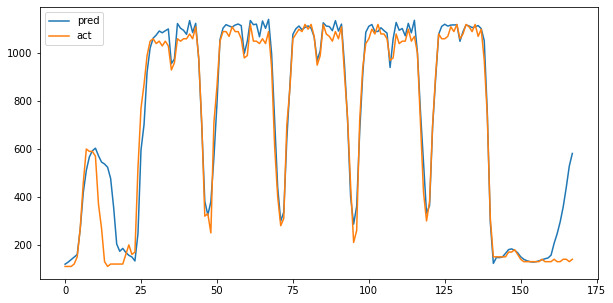

In [25]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(acts, preds, squared=False)

96.89839947558565

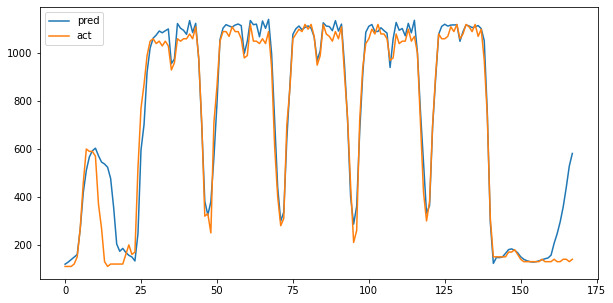

In [27]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")
